## Demo 1

### Step 1 (Formulate a Question)

 *  How can text be data? 
 * How does textual data provide information about novels?

### Step 2 (Gather and Format the Data)

In [51]:
# Importing packages

import numpy as np
from urllib.request import urlopen 
import re
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action="ignore")

In [2]:
# Acquire data 

url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_binary = urlopen(url).read()

In [3]:
# Binary format

" ".join(format(x,'b') for x in huck_finn_binary[:100])

'11101111 10111011 10111111 1101 1010 1101 1010 1010100 1101000 1100101 100000 1010000 1110010 1101111 1101010 1100101 1100011 1110100 100000 1000111 1110101 1110100 1100101 1101110 1100010 1100101 1110010 1100111 100000 1000101 1000010 1101111 1101111 1101011 100000 1101111 1100110 100000 1000001 1100100 1110110 1100101 1101110 1110100 1110101 1110010 1100101 1110011 100000 1101111 1100110 100000 1001000 1110101 1100011 1101011 1101100 1100101 1100010 1100101 1110010 1110010 1111001 100000 1000110 1101001 1101110 1101110 101100 100000 1000011 1101111 1101101 1110000 1101100 1100101 1110100 1100101 1101 1010 1100010 1111001 100000 1001101 1100001 1110010 1101011 100000 1010100 1110111 1100001 1101001 1101110 100000 101000 1010011 1100001 1101101 1110101 1100101'

In [4]:
# Convert from binary format to utf-8 format

huck_finn_utf8 = huck_finn_binary.decode(encoding='utf-8')

In [5]:
huck_finn_utf8[:91]

'\ufeff\r\n\r\nThe Project Gutenberg EBook of Adventures of Huckleberry Finn, Complete\r\nby Mark Twain'

In [6]:
# Remove white space

huck_finn_text = re.sub('\s+', ' ', huck_finn_utf8)

In [7]:
huck_finn_text[:88]

'\ufeff The Project Gutenberg EBook of Adventures of Huckleberry Finn, Complete by Mark Twain '

In [8]:
# Save file

with open("huck_finn.txt","w+") as file_handle: 
        file_handle.write(huck_finn_text[1:])

In [ ]:
# Display the first 100 lines 

!head -n 100 "huck_finn.txt"

In [10]:
# Utility function to get data from website

def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [11]:
# Get request for text file on website 

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)

with open("little_women.txt","w") as file_handle: 
        file_handle.write(little_women_text[1:])

In [ ]:
!head -n 100 "little_women.txt"

### Step 3 (Summarize and Visualize the Data)

In [14]:
with open("little_women.txt","r") as fh_little_women, open("huck_finn.txt","r") as fh_huck_finn: 
    huck_finn_text = fh_huck_finn.read()
    little_women_text = fh_little_women.read()

    huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]
    little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [15]:
# Display the chapters of Huckleberry Finn as table

df_huck_finn = pd.Series(data=huck_finn_chapters, index=np.arange(1,len(huck_finn_chapters)+1))
df_huck_finn.head(10)

1     I. YOU don't know about me without you have re...
2     II. WE went tiptoeing along a path amongst the...
3     III. WELL, I got a good going-over in the morn...
4     IV. WELL, three or four months run along, and ...
5     V. I had shut the door to. Then I turned aroun...
6     VI. WELL, pretty soon the old man was up and a...
7     VII. "GIT up! What you 'bout?" I opened my eye...
8     VIII. THE sun was up so high when I waked that...
9     IX. I wanted to go and look at a place right a...
10    X. AFTER breakfast I wanted to talk about the ...
dtype: object

In [16]:
# Count how many times the names Jim, Tom, and Huck appear in each chapter

hf_counts = pd.DataFrame(data = {
        'Jim': np.char.count(huck_finn_chapters, 'Jim'),
        'Tom': np.char.count(huck_finn_chapters, 'Tom'),
        'Huck': np.char.count(huck_finn_chapters, 'Huck')})

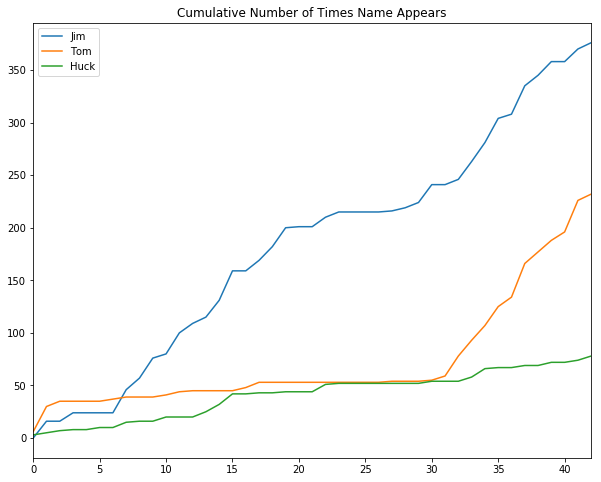

In [18]:
# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cumul_counts = hf_counts.cumsum() 
cumul_counts.plot(figsize = (10,8))
plt.title('Cumulative Number of Times Name Appears');

In [19]:
# Display the chapters of Little Women as table

df_little_women = pd.Series(data=little_women_chapters, 
                            index=np.arange(1,len(little_women_chapters)+1))
df_little_women.head(10)

1     ONE PLAYING PILGRIMS "Christmas won't be Chris...
2     TWO A MERRY CHRISTMAS Jo was the first to wake...
3     THREE THE LAURENCE BOY "Jo! Jo! Where are you?...
4     FOUR BURDENS "Oh, dear, how hard it does seem ...
5     FIVE BEING NEIGHBORLY "What in the world are y...
6     SIX BETH FINDS THE PALACE BEAUTIFUL The big ho...
7     SEVEN AMY'S VALLEY OF HUMILIATION "That boy is...
8     EIGHT JO MEETS APOLLYON "Girls, where are you ...
9     NINE MEG GOES TO VANITY FAIR "I do think it wa...
10    TEN THE P.C. AND P.O. As spring came on, a new...
dtype: object

In [20]:
# Counts of names in the chapters of Little Women

people = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
people_counts = {pp: np.char.count(little_women_chapters, pp) for pp in people}
lw_counts = pd.DataFrame(data=people_counts)

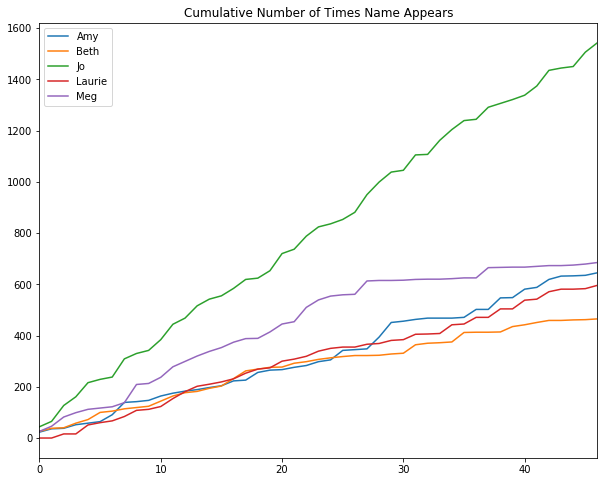

In [22]:
# Plot the cumulative counts

cumul_counts = lw_counts.cumsum()
cumul_counts.plot(figsize=(10,8))
plt.title('Cumulative Number of Times Name Appears');

### Step 3 Continued (Explore the Data to Find Patterns)

_**Relationship between amount of punctuation and length of chapter**_

In [23]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

punctuation = '.'

hf_length_punctuation = pd.DataFrame({
        'HF Chapter Length': [len(s) for s in huck_finn_chapters],
        'Number of Periods': np.char.count(huck_finn_chapters, punctuation)
    })
lw_length_punctuation = pd.DataFrame({
        'LW Chapter Length': [len(s) for s in little_women_chapters],
        'Number of Periods': np.char.count(little_women_chapters, punctuation)
    })

In [24]:
# The counts for Huckleberry Finn

hf_length_punctuation.head(10)

,HF Chapter Length,Number of Periods
0,7026,66
1,11982,117
2,8529,72
3,6799,84
4,8166,91
5,14550,125
6,13218,127
7,22208,249
8,8081,71
9,7036,70


In [25]:
# The counts for Little Women

lw_length_punctuation.head(10)

,LW Chapter Length,Number of Periods
0,21759,189
1,22148,188
2,20558,231
3,25526,195
4,23395,255
5,14622,140
6,14431,131
7,22476,214
8,33767,337
9,18508,185


In [26]:
hf_X, hf_y = hf_length_punctuation.iloc[:,1].as_matrix().reshape(-1,1), hf_length_punctuation.iloc[:,0].as_matrix().reshape(-1,1)
lw_X, lw_y = lw_length_punctuation.iloc[:,1].as_matrix().reshape(-1,1), lw_length_punctuation.iloc[:,0].as_matrix().reshape(-1,1)

hf_reg = LinearRegression().fit(hf_X, hf_y)
lw_reg = LinearRegression().fit(lw_X, lw_y)


In [34]:
xaxis = np.linspace(0,375,1000)
hf_yaxis = hf_reg.coef_[0][0] * xaxis + hf_reg.intercept_[0]
lw_yaxis = lw_reg.coef_[0][0] * xaxis + lw_reg.intercept_[0]

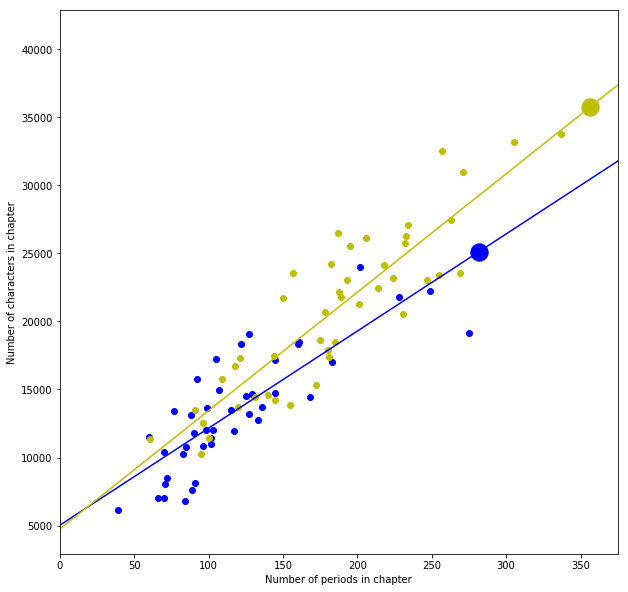

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(hf_length_punctuation.iloc[:,1], hf_length_punctuation.iloc[:,0], color='b')
plt.scatter(lw_length_punctuation.iloc[:,1], lw_length_punctuation.iloc[:,0], color='y')
plt.xlabel('Number of periods in chapter')
plt.ylabel('Number of characters in chapter')
plt.xlim(0,375)
plt.plot(xaxis, hf_yaxis, color="b")
plt.scatter(xaxis[750], hf_yaxis[750],color="b",s=300)
plt.plot(xaxis, lw_yaxis, color="y")
plt.scatter(xaxis[950], lw_yaxis[950],color="y",s=300);

In [42]:
print('Average number of characters in Twain sentence', hf_reg.coef_[0][0])

Average number of characters in Twain sentence 71.32912377812522


In [43]:
print('Average number of characters in Alcott sentence',lw_reg.coef_[0][0])

Average number of characters in Alcott sentence 86.97784125829821


_**Distinguishing between novels by length of words**_

In [44]:
huck_finn_word_length = list(map(lambda x: len(x.strip()), 
                                 (" ".join(huck_finn_chapters)).split(' ')))


little_women_word_length = list(map(lambda x: len(x.strip()), 
                                 (" ".join(little_women_chapters)).split(' ')))


df_huck_finn_word_length = pd.DataFrame(columns=['Huck Finn'],
                                           data=pd.Series(data=huck_finn_word_length).value_counts().sort_index()[1:21], index=np.arange(1,21))


df_little_women_word_length = pd.DataFrame(columns=['Little Women'],
                                           data=pd.Series(data=little_women_word_length).value_counts().sort_index()[1:21], index=np.arange(1,21))

df_merged = pd.merge(df_huck_finn_word_length.div(df_huck_finn_word_length.sum()), 
                     df_little_women_word_length.div(df_little_women_word_length.sum()), 
                     how='outer', 
                     left_index=True,
                    right_index=True)

In [47]:
df_little_women_word_length[:10]

,Little Women
1,7139
2,28049
3,45459
4,35207
5,23651
6,17187
7,12420
8,8271
9,4981
10,3044


In [48]:
df_huck_finn_word_length[:10]

,Huck Finn
1,6000
2,18154
3,28809
4,21145
5,14628
6,10003
7,6105
8,3350
9,1820
10,1167


In [49]:
lw_mean = np.dot(df_little_women_word_length.index, 
df_little_women_word_length["Little Women"]) / df_little_women_word_length.sum()[0]

hf_mean = np.dot(df_huck_finn_word_length.index, 
df_huck_finn_word_length["Huck Finn"]) / df_huck_finn_word_length.sum()[0]

print(f"The average length of word in Huck Finn is {hf_mean}")
print(f"The average length of word in Little Women is {lw_mean}")

The average length of word in Huck Finn is 4.120411381191978
The average length of word in Little Women is 4.398593914734227


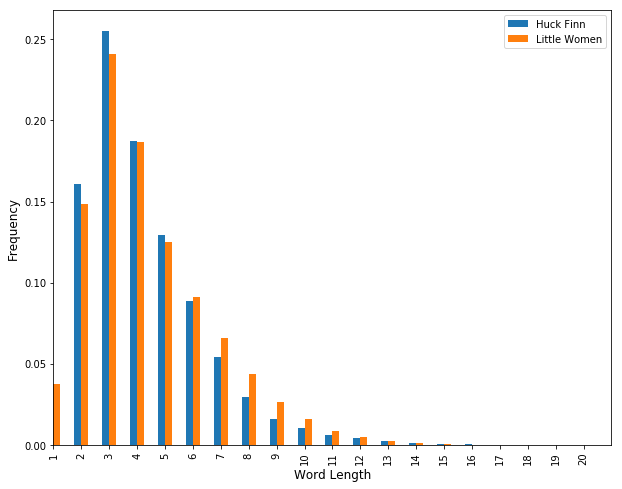

In [53]:
df_merged.plot(kind='bar', figsize = (10,8))
plt.xlim(xmin=0, xmax = 20)
plt.gca().set_xlabel("Word Length", fontsize=12)
plt.gca().set_ylabel("Frequency", fontsize=12)
plt.plot();

_**Relationship Between Frequency and Rank**_

In [62]:
huck_finn_word_count = list(map(lambda x: x.strip().lower(), 
                                 (" ".join(huck_finn_chapters)).split(' ')))
df_huck_finn_word_count = pd.Series(data=huck_finn_word_count).value_counts().sort_values(ascending = False)[:50]
df_huck_finn_word_count = df_huck_finn_word_count.to_frame().reset_index().rename(columns = {'index':'word', 0:'count'})
df_huck_finn_word_count['rank'] = df_huck_finn_word_count.index + 1
df_huck_finn_word_count['frequency'] = df_huck_finn_word_count['count'] / df_huck_finn_word_count['count'].sum() 
df_huck_finn_word_count = df_huck_finn_word_count.set_index('word')
df_huck_finn_word_count.iloc[:10,:]

,count,rank,frequency
word,,,
and,6241,1,0.125548
the,4896,2,0.098491
i,3040,3,0.061155
a,2948,4,0.059304
to,2902,5,0.058379
was,1944,6,0.039107
of,1727,7,0.034742
he,1628,8,0.032750
it,1591,9,0.032006


In [56]:
hf_count_reg = LinearRegression().fit(np.log(df_huck_finn_word_count['rank'].as_matrix()).reshape(-1,1),
                             np.log(df_huck_finn_word_count['frequency'].as_matrix()).reshape(-1,1))

hf_count_reg.coef_[0][0]

-0.8402098414702733

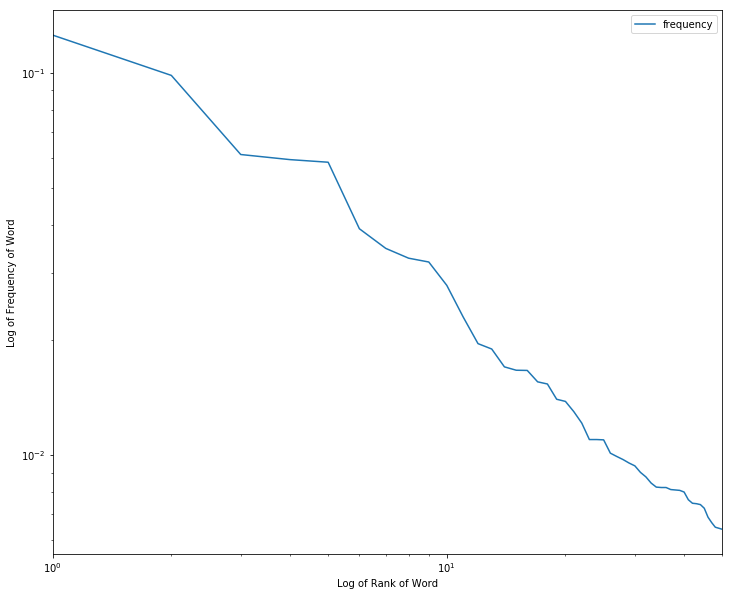

In [59]:
fig, ax = plt.subplots(1,1, figsize= (12,10))
df_huck_finn_word_count.plot('rank','frequency', logx=True, logy=True, ax = ax)
plt.xlabel('Log of Rank of Word');
plt.ylabel('Log of Frequency of Word');
plt.show();

In [63]:
little_women_word_count = list(map(lambda x: x.strip().lower(), 
                                 (" ".join(little_women_chapters)).split(' ')))
df_little_women_word_count = pd.Series(data=little_women_word_count).value_counts().sort_values(ascending = False)[:50]
df_little_women_word_count = df_little_women_word_count.to_frame().reset_index().rename(columns = {'index':'word', 0:'count'})
df_little_women_word_count['rank'] = df_little_women_word_count.index + 1
df_little_women_word_count['frequency'] = df_little_women_word_count['count'] / df_little_women_word_count['count'].sum() 
df_little_women_word_count = df_little_women_word_count.set_index('word')
df_little_women_word_count.iloc[:10,:]

,count,rank,frequency
word,,,
and,8010,1,0.104657
the,7609,2,0.099417
to,5090,3,0.066505
a,4456,4,0.058221
of,3474,5,0.045390
her,2884,6,0.037682
i,2663,7,0.034794
in,2429,8,0.031737
she,2241,9,0.029280


In [64]:
lw_count_reg = LinearRegression().fit(np.log(df_little_women_word_count['rank'].as_matrix()).reshape(-1,1),
                             np.log(df_little_women_word_count['frequency'].as_matrix()).reshape(-1,1))

lw_count_reg.coef_[0][0]

-0.8608872486840786

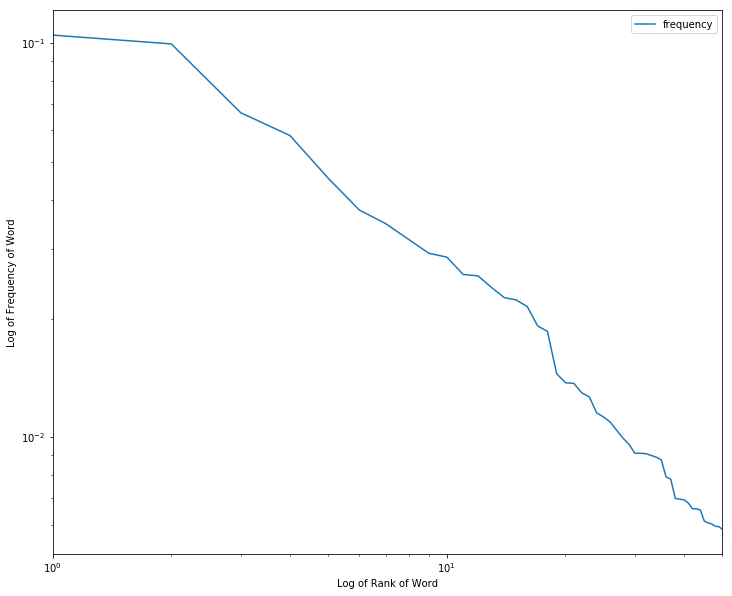

In [65]:
fig, ax = plt.subplots(1,1, figsize= (12,10))
df_little_women_word_count.plot('rank','frequency', logx=True, logy=True, ax = ax)
plt.xlabel('Log of Rank of Word');
plt.ylabel('Log of Frequency of Word');
plt.show();

### Step 1 Continued (Formulate a Question)

The plots of rank versus frequency suggest a pattern 

$$\large \text{Frequency} \approx \displaystyle\frac{1}{\text{Rank}^{0.85}}$$

This pattern of frequency and rank is called the Zipf rule. How common is it?